<a href="https://colab.research.google.com/github/joeyMckinney/video-game-sales/blob/master/video_game_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

In [ ]:
!pip install chart_studio

In [ ]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/joeyMckinney/video-game-sales/master/vgsales.csv')

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
df.shape

(16598, 11)

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df1.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df1 = df1.dropna(subset=['Year'])

In [ ]:
df1.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [ ]:
df1.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
df1['Genre'].value_counts()

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

In [ ]:
df_sub = df[['Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [ ]:
df_sub.head(20)

,Genre,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Sports,82.74,41.49,29.02,3.77,8.46
1,Platform,40.24,29.08,3.58,6.81,0.77
2,Racing,35.82,15.85,12.88,3.79,3.31
3,Sports,33.00,15.75,11.01,3.28,2.96
4,Role-Playing,31.37,11.27,8.89,10.22,1.00
5,Puzzle,30.26,23.20,2.26,4.22,0.58
6,Platform,30.01,11.38,9.23,6.50,2.90
7,Misc,29.02,14.03,9.20,2.93,2.85
8,Platform,28.62,14.59,7.06,4.70,2.26
9,Shooter,28.31,26.93,0.63,0.28,0.47


In [ ]:
df_sub['Genre'] = df_sub['Genre'].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_sub.dtypes

Genre           category
Global_Sales     float64
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
dtype: object

In [ ]:
grouped = df_sub.groupby('Genre').sum()

In [ ]:
grouped = grouped.reset_index()
grouped.head()

,Genre,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,1751.18,877.83,525.00,159.95,187.38
1,Adventure,239.04,105.80,64.13,52.07,16.81
2,Fighting,448.91,223.59,101.32,87.35,36.68
3,Misc,809.96,410.24,215.98,107.76,75.32
4,Platform,831.37,447.05,201.63,130.77,51.59


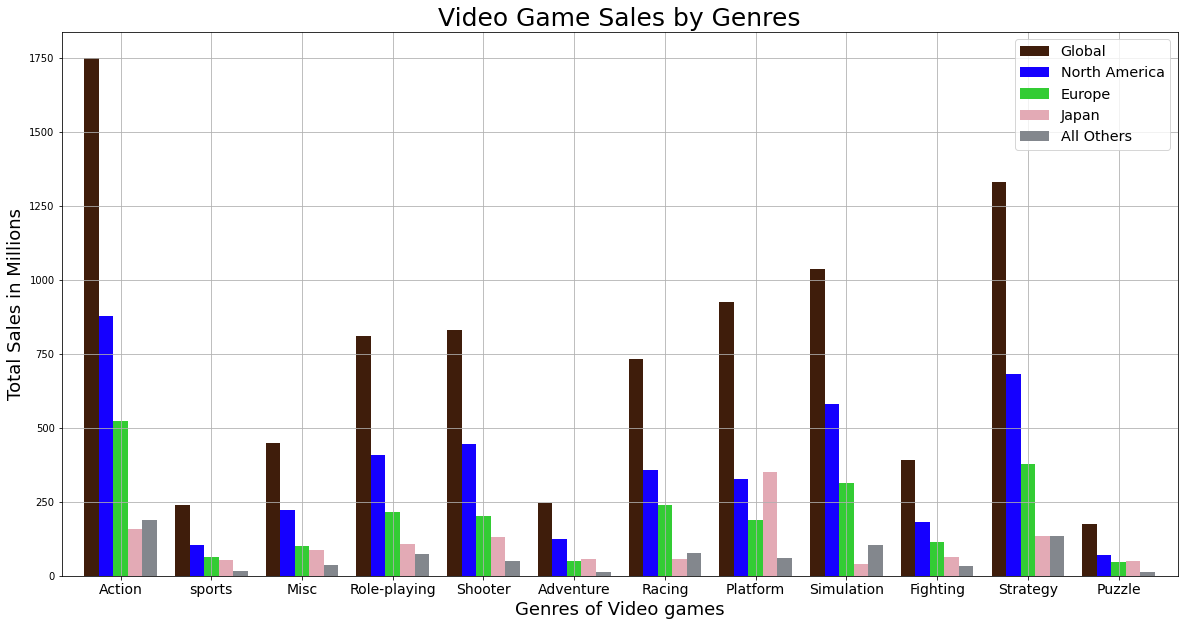

In [ ]:
ax = grouped.plot(kind='bar', rot=0, figsize=(20,10), legend=True, width=0.8, grid=True, color=('#3F1D0B', '#1500ff', '#33CC34', '#E3AAB5', '#83878D'))

ax.set_xticklabels(['Action', 'sports', 'Misc', 'Role-playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'], fontsize=14)
ax.set_xlabel('Genres of Video games', fontsize=18)
ax.set_ylabel('Total Sales in Millions', fontsize=18)
ax.set_title('Video Game Sales by Genres', fontsize=25) 
ax.legend(['Global', 'North America', 'Europe', 'Japan', 'All Others'], fontsize = 'x-large')
plt.savefig('/content/video_game_sales_by_genres.jpg')
plt.show()

In [ ]:
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df_sub2 = df1[['Genre', 'Year', 'Global_Sales']]
df_sub2.head()

,Genre,Year,Global_Sales
0,Sports,2006.0,82.74
1,Platform,1985.0,40.24
2,Racing,2008.0,35.82
3,Sports,2009.0,33.00
4,Role-Playing,1996.0,31.37


In [ ]:
grouped2 = df_sub2.groupby(['Year', 'Genre']).sum()
grouped2 = grouped2.reset_index()

In [ ]:
grouped2.head()

,Year,Genre,Global_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.71
3,1980.0,Shooter,7.07
4,1980.0,Sports,0.49


In [ ]:
username = 'josiahmckinney' # your username
api_key = '8jR5j3MsOvGs3lhp0ElQ' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [ ]:
fig = px.line(grouped2, x='Year', y='Global_Sales', color='Genre')
fig.update_layout(title='Global Sales for Each Genre by Year',
                   xaxis_title='Year',
                   yaxis_title='Globle Sales in Millions')
plot_url = py.plot(fig, filename = 'genre_sales_years', auto_open=True)

fig.show()

In [ ]:
grouped2.head()

,Year,Genre,Global_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.71
3,1980.0,Shooter,7.07
4,1980.0,Sports,0.49


In [ ]:
grouped2['Genre'].value_counts()

Action          38
Sports          37
Shooter         36
Platform        36
Puzzle          33
Racing          32
Role-Playing    32
Simulation      31
Misc            31
Fighting        29
Adventure       28
Strategy        26
Name: Genre, dtype: int64

In [ ]:
grouped3 = grouped2[grouped2.Genre != 'Misc']
grouped3 = grouped3[grouped2.Genre != 'Racing']
grouped3 = grouped3[grouped2.Genre != 'Simulation']
grouped3 = grouped3[grouped2.Genre != 'Adventure']
grouped3 = grouped3[grouped2.Genre != 'Strategy']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
grouped3['Genre'].value_counts()

Action          38
Sports          37
Shooter         36
Platform        36
Puzzle          33
Role-Playing    32
Fighting        29
Name: Genre, dtype: int64

In [ ]:
fig = px.line(grouped3, x='Year', y='Global_Sales', color='Genre')

fig.update_layout(title='Global Sales for each Genre that was at the top at some point by Year',
                   xaxis_title='Year',
                   yaxis_title='Globle Sales in Millions')
plot_url2 = py.plot(fig, filename = 'genre_sales_years_top', auto_open=True)
fig.show()

In [ ]:
tls.get_embed(plot_url)

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~josiahmckinney/1.embed" height="525" width="100%"></iframe>'

In [ ]:
tls.get_embed(plot_url2)

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~josiahmckinney/6.embed" height="525" width="100%"></iframe>'